<a href="https://colab.research.google.com/github/TulipAggarwal/SecureSlice/blob/main/SecureSlice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SecureSlice : Network Slicing analysis using Deep Learning**

#Data Preparation

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:
train_dataset = pd.read_csv("/content/train_dataset.csv")
test_dataset = pd.read_csv("/content/test_dataset.csv")
print(f"train dataset shape : {train_dataset.shape}\n test dataset shape : {test_dataset.shape}")
train_dataset.head(10)

train dataset shape : (31583, 17)
 test dataset shape : (31584, 16)


,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
5,19,2,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3
6,15,2,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
7,19,3,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0,1
8,8,20,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1
9,13,10,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1


In [ ]:
#Checking if NAN form of data is present in the dataset
print(train_dataset.isna().sum())
print(test_dataset.isna().sum())

LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
slice Type              0
dtype: int64
LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
dtype: int64


#Exploratory Data Analysis (EDA) for the dataset used

For creating the various visulations for the EDA process here we have imported matplotlib and seaborn libraries of python.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

The following code utilizes Matplotlib and Seaborn to visualize probabilistic distributions of 'LTE/5g Category' for train and test datasets. The train plot includes a 'slice Type' hue for additional insight into the data. The x-axis represents 'LTE/5g Category,' and the y-axis represents the probability. The legend and axes are customized for clarity and readability.

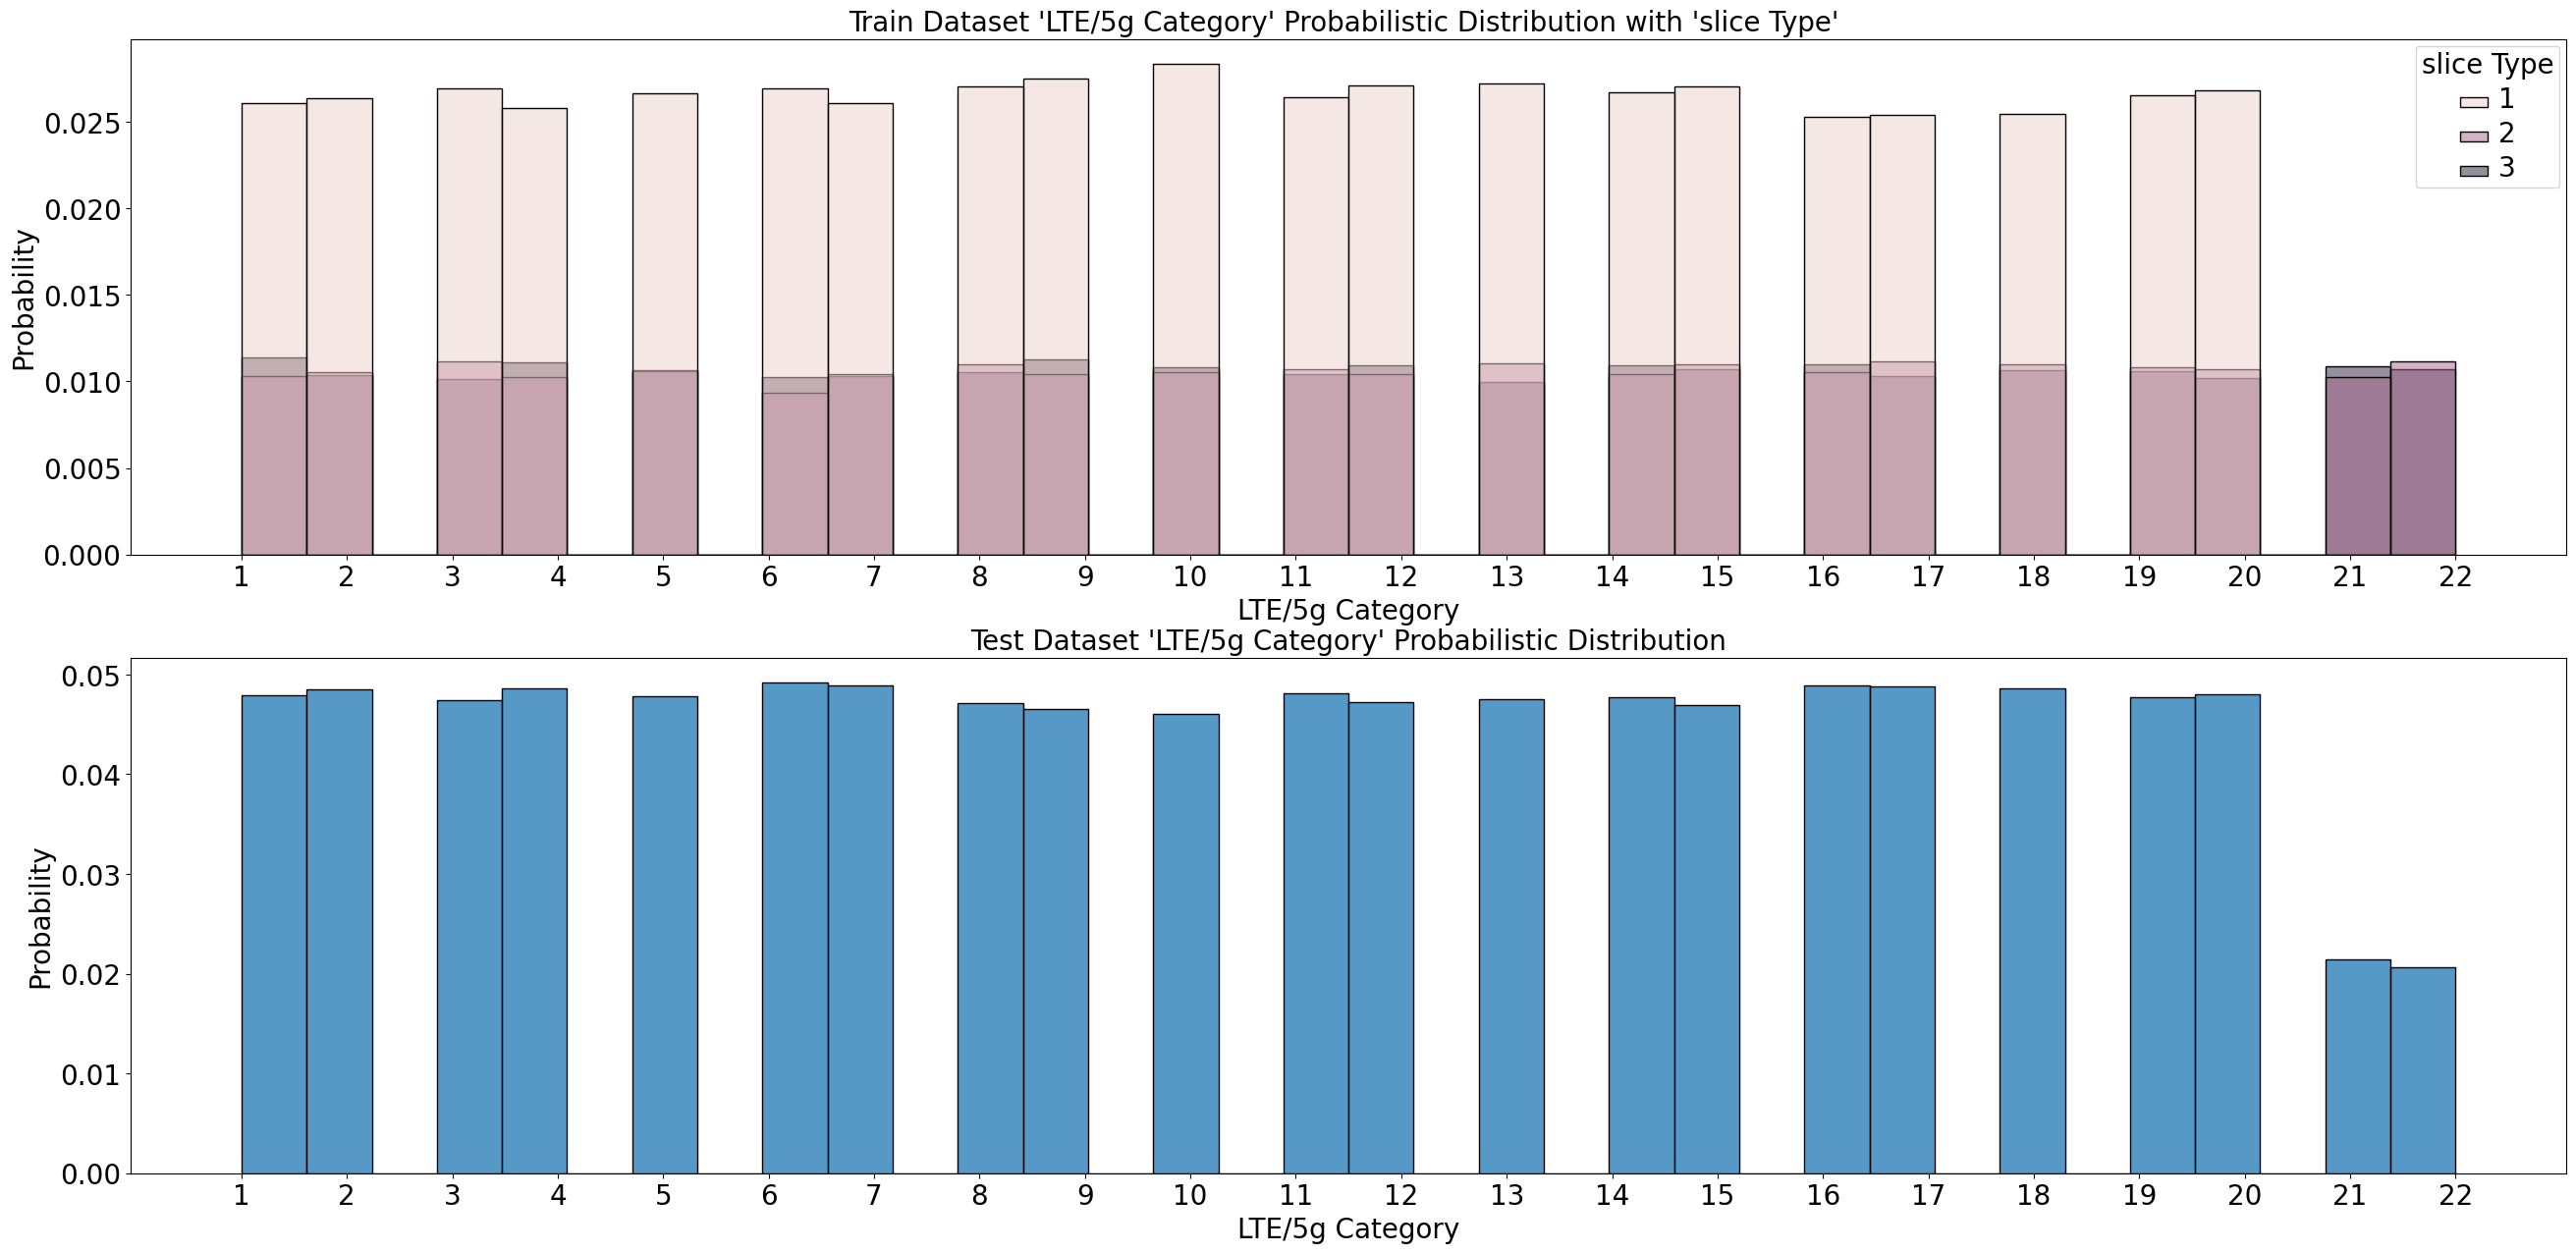

In [ ]:
#'LTE/5g Category' probabilistic distributions.

fig = plt.figure(figsize = (32,15))
#For train dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'LTE/5g Category' Probabilistic Distribution with 'slice Type' ",fontsize =20)
train_lte_hist = sns.histplot(data = train_dataset,x = "LTE/5g Category",stat = "probability",
                              hue = "slice Type")

plt.xticks(train_dataset["LTE/5g Category"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.yticks(np.arange(0.000,0.030,0.005),fontsize = 20);

plt.setp(train_lte_hist.get_legend().get_texts(),fontsize = '20')
plt.setp(train_lte_hist.get_legend().get_title(),fontsize = '20');
#For test dataset
plt.subplot(2,1,2)
plt.title("Test Dataset 'LTE/5g Category' Probabilistic Distribution",fontsize =20)
sns.histplot(data = test_dataset,x = "LTE/5g Category",stat = "probability")

plt.xticks(test_dataset["LTE/5g Category"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.yticks(np.arange(0.00,0.06,0.01),fontsize = 20);


The following code creates a scatter plot using Seaborn to show the relationship between 'Time' and 'slice Type' in the train dataset, with points colored by the frequency of each combination.

<Axes: title={'center': "Train dataset 'Time' feature with 'slice Type' "}, xlabel='Time', ylabel='slice Type'>

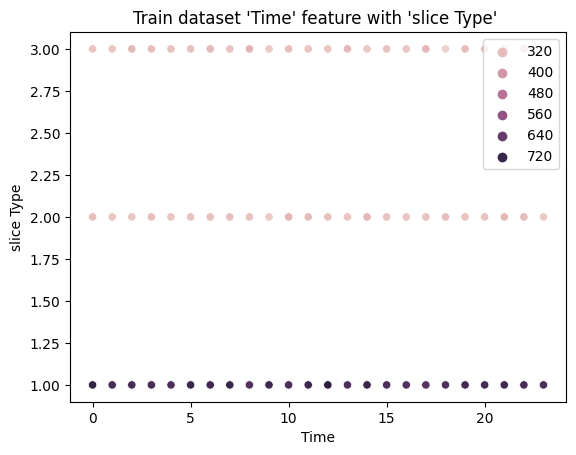

In [ ]:
#Time feature with slice type.

plt.title("Train dataset 'Time' feature with 'slice Type' ")

time_slice_type = pd.concat([train_dataset["Time"],train_dataset["slice Type"]],axis = 1)
time = time_slice_type.value_counts().index.get_level_values(0)
slice_type = time_slice_type.value_counts().index.get_level_values(1)

sns.scatterplot(x = time,y = slice_type,hue = time_slice_type.value_counts().values)

In the code written below, first it prints descriptive statistics of the 'Time' feature in the train dataset using the describe() method. Subsequently, it generates a Seaborn scatter plot with a figure size of 18x12 inches. The plot visualizes the correlation between 'Time' and 'LTE/5g Category,' with points color-coded based on 'slice Type.' The x-axis represents "LTE/5g Category," the y-axis represents "Time," and the plot aims to uncover patterns in time-related behavior within different 'LTE/5g Category' values, considering 'slice Type.'

count    31583.000000
mean        11.476459
std          6.915643
min          0.000000
25%          6.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: Time, dtype: float64


Text(0, 0.5, 'Time')

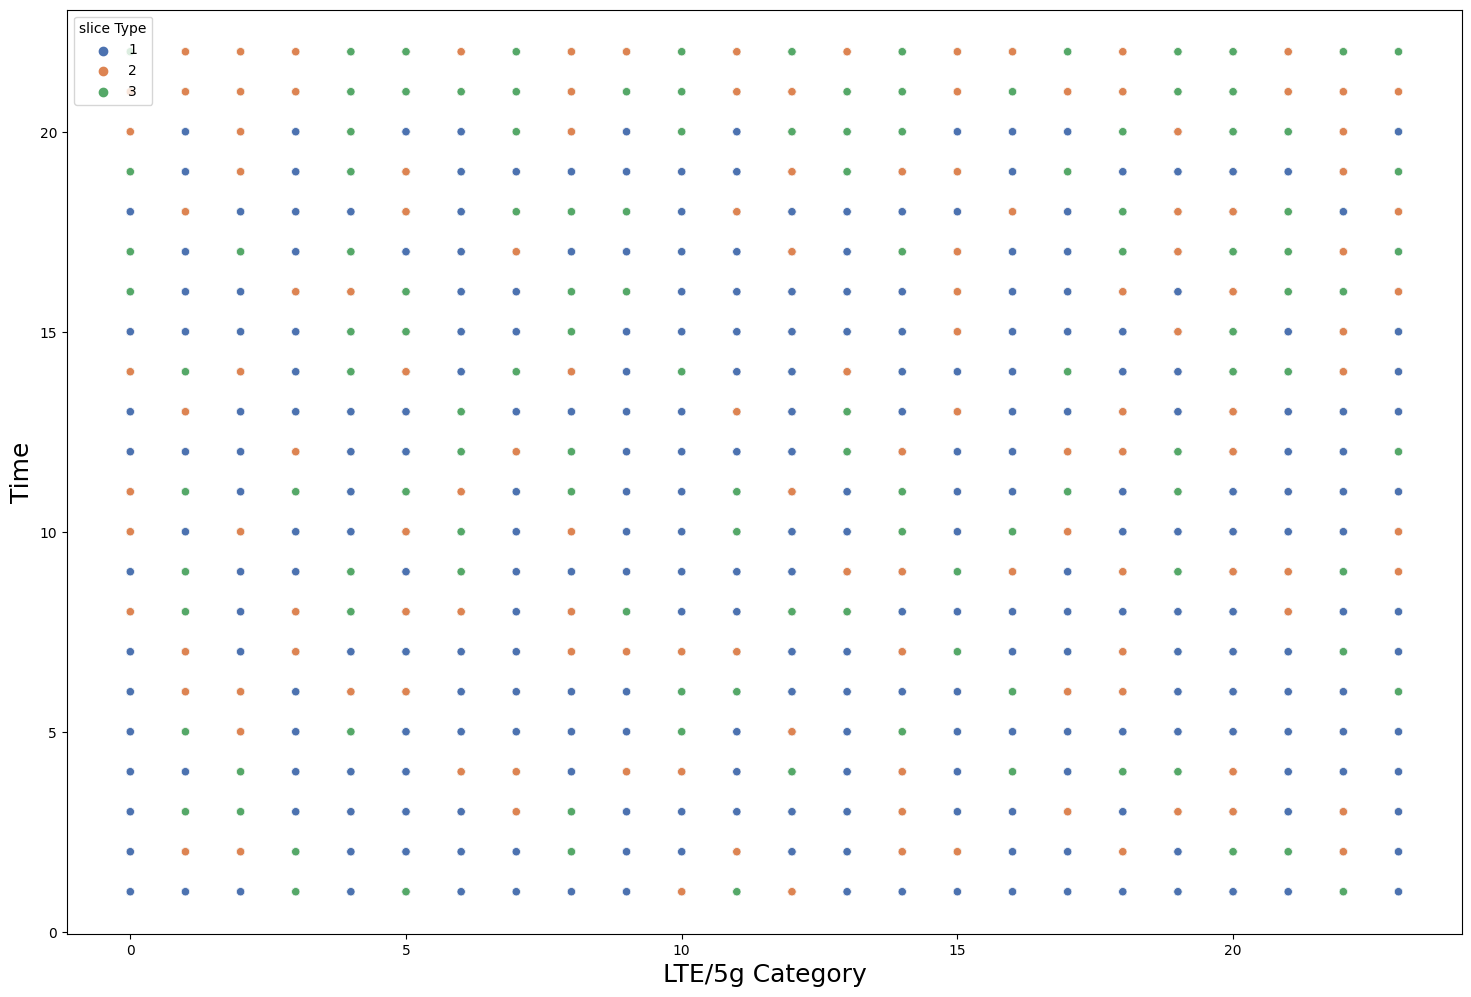

In [ ]:
print(train_dataset["Time"].describe())

plt.figure(figsize = (18,12))
sns.scatterplot(data = train_dataset,x = "Time", y= "LTE/5g Category",hue = "slice Type",
                palette = "deep")


plt.xlabel("LTE/5g Category",fontsize = 18)
plt.ylabel("Time",fontsize = 18)

This code in the following cell generates a 2x1 subplot figure to visualize the probabilistic distribution of 'Packet Loss Rate' in both the train and test datasets. Seaborn's histplot is used with the 'probability' statistic. The x-axis represents 'Packet Loss Rate,' while the y-axis denotes the probability of occurrence. Customizations include setting x-axis ticks, y-axis ticks, and labels for clarity. The train dataset subplot is in blue, and the test dataset subplot is in red, allowing for a comparison of 'Packet Loss Rate' distributions between the two datasets.

Text(0, 0.5, 'Probability')

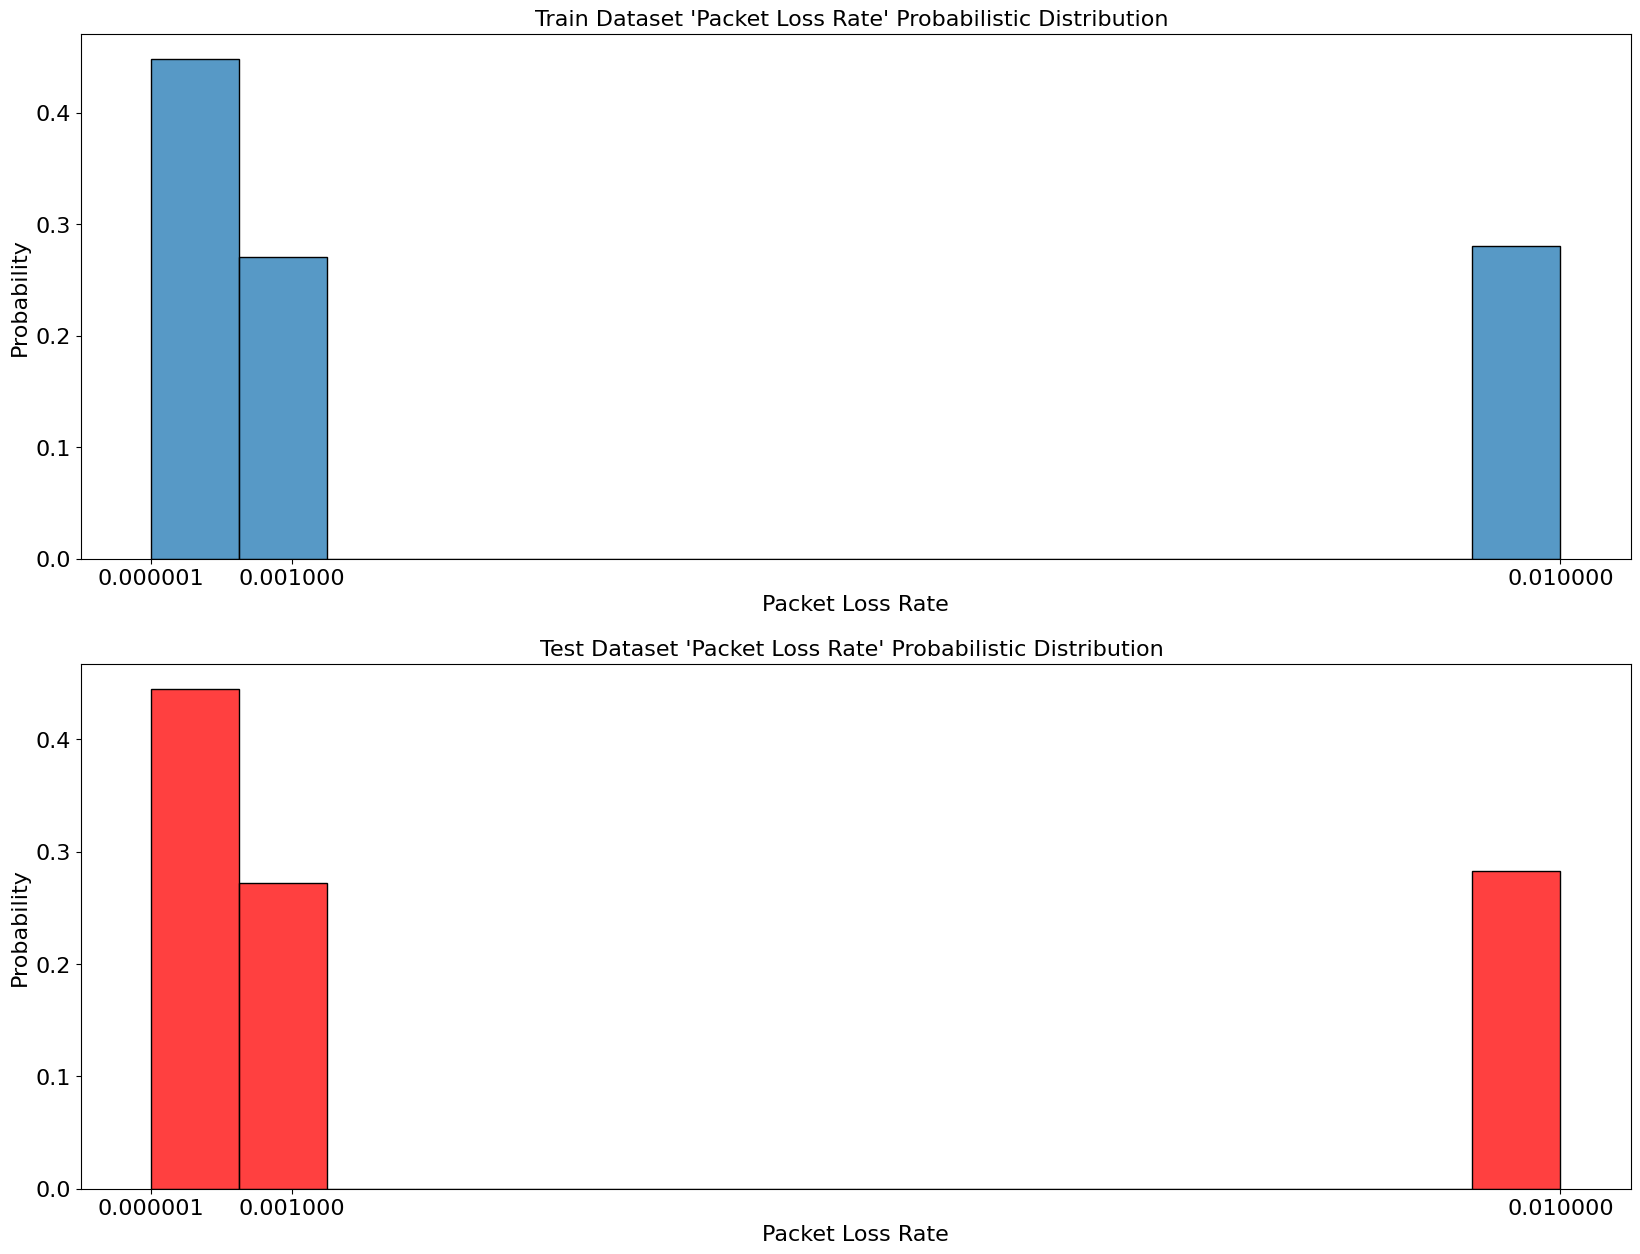

In [ ]:
#Packet loss rate

fig = plt.figure(figsize = (20,15))
#For train dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'Packet Loss Rate' Probabilistic Distribution ",fontsize =16)
train_lte_hist = sns.histplot(data = train_dataset,x = "Packet Loss Rate",stat = "probability")

plt.xticks(train_dataset["Packet Loss Rate"].value_counts().index,fontsize = 16)
plt.yticks(np.arange(0,0.5,0.1),fontsize = 16)
plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Probability",fontsize = 16)

#For test dataset
plt.subplot(2,1,2)
plt.title("Test Dataset 'Packet Loss Rate' Probabilistic Distribution ",fontsize =16)
train_lte_hist = sns.histplot(data = test_dataset,x = "Packet Loss Rate",stat = "probability",
                             color = "red")

plt.xticks(test_dataset["Packet Loss Rate"].value_counts().index,fontsize = 16)
plt.yticks(np.arange(0,0.5,0.1),fontsize = 16)
plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Probability",fontsize = 16)

The following code uses Matplotlib to create a subplot with two graphs, displaying the distribution of 'Packet Loss Rate' in train and test datasets. The top graph represents the train dataset, and the bottom one represents the test dataset. It uses markers ('o') to indicate data points. The x-axis represents unique 'Packet Loss Rate' values, and the y-axis shows the corresponding counts. The color green is used for the test dataset graph. Overall, the code provides a visual representation of packet loss rates in the datasets for analysis and comparison.

Text(0, 0.5, 'Count')

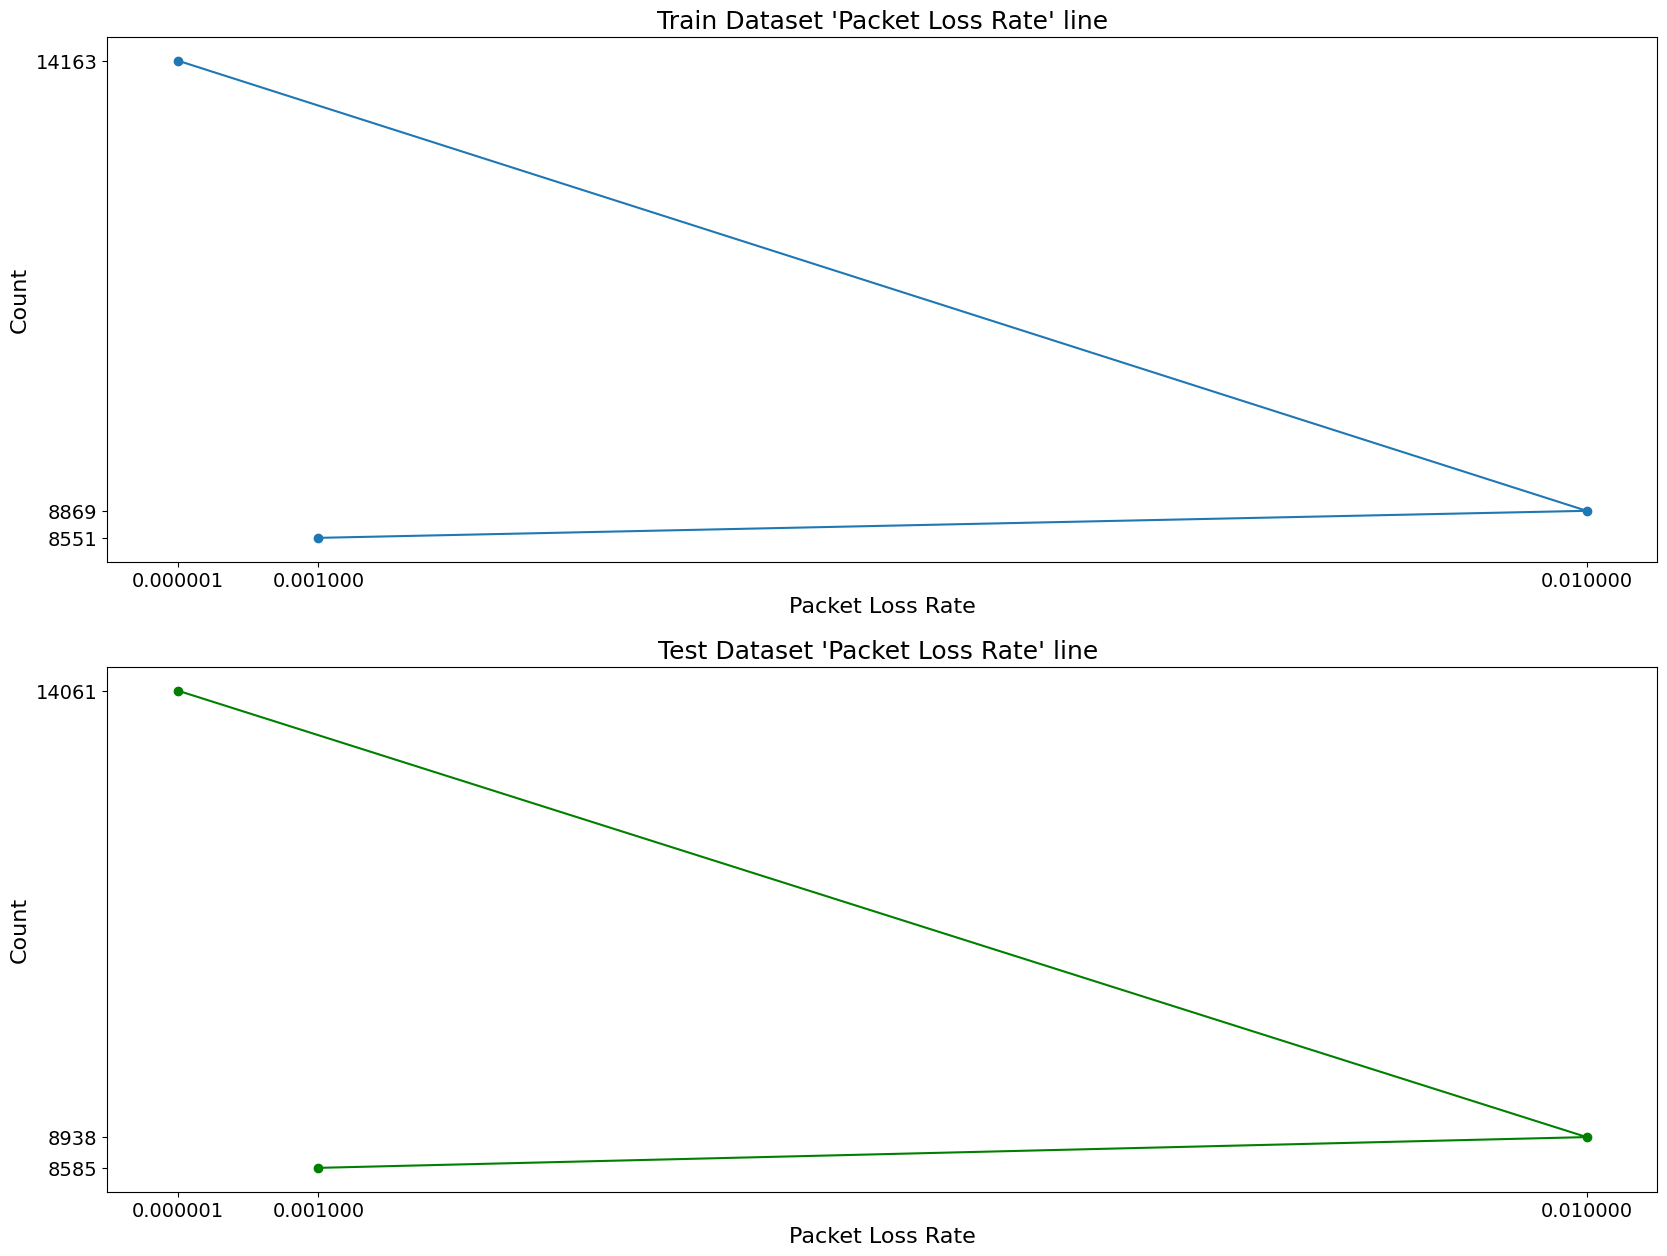

In [ ]:
plt.figure(figsize = (20,15))
#For train dataset
plt.subplot(2,1,1)

plt.title("Train Dataset 'Packet Loss Rate' line",fontsize = 18)
plt.plot(train_dataset["Packet Loss Rate"].value_counts(),marker = "o")
plt.xticks(train_dataset["Packet Loss Rate"].unique(),fontsize = 14)
plt.yticks(train_dataset["Packet Loss Rate"].value_counts(),fontsize = 14)

plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Count",fontsize = 16)
#For test dataset
plt.subplot(2,1,2)

plt.title("Test Dataset 'Packet Loss Rate' line ",fontsize = 18)
plt.plot(test_dataset["Packet Loss Rate"].value_counts(),marker = "o",color = "green")
plt.xticks(test_dataset["Packet Loss Rate"].unique(),fontsize = 14)
plt.yticks(test_dataset["Packet Loss Rate"].value_counts(),fontsize = 14)

plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Count",fontsize = 16)

This following code generates a side-by-side comparison of 'Packet delay' in the train dataset, showing histograms with color-coded bars for different 'slice Types'. The right subplot displays the probability distribution of 'Packet delay' in the test dataset using a kernel density estimate (KDE) for a smoother visualization. The code provides insights into the distribution of packet delays in the context of slice types for the train dataset and illustrates the overall probability distribution in the test dataset.

<ipython-input-128-c83764e31f54>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = train_dataset,x = "Packet delay",palette = "deep",stat = "probability",


<Axes: title={'center': "Test Dataset 'Packet delay' probability distributions"}, xlabel='Packet delay', ylabel='Probability'>

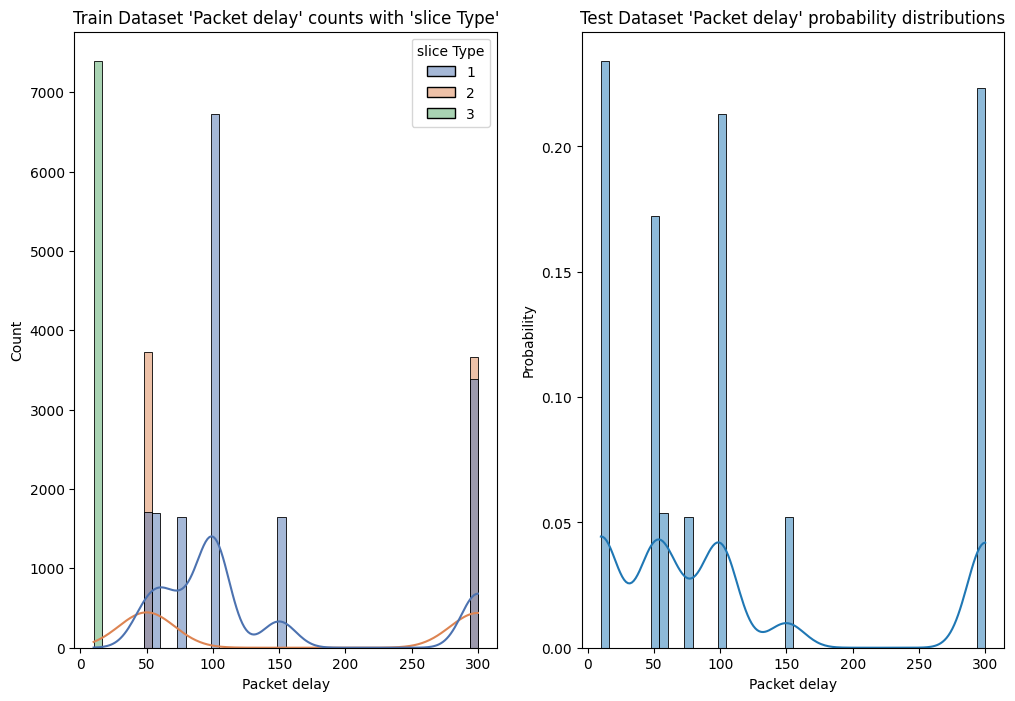

In [ ]:
plt.figure(figsize = (12,8))
#For train dataset
plt.subplot(1,2,1)
plt.title("Train Dataset 'Packet delay' counts with 'slice Type'")
sns.histplot(data = train_dataset,x = "Packet delay",hue = "slice Type",palette = "deep",
            kde = True)
#For test dataset
plt.subplot(1,2,2)
plt.title("Test Dataset 'Packet delay' probability distributions")
sns.histplot(data = train_dataset,x = "Packet delay",palette = "deep",stat = "probability",
            kde = True)

In the below code it generates a pair of visualizations for the train dataset. The first subplot illustrates the probability distribution of 'slice Type' concerning the presence of 'IoT Devices.' Different colors represent various categories of IoT devices. The second subplot visualizes the probability distribution of 'slice Type' considering the presence of 'LTE/5G.' Each bar represents the likelihood of a specific 'slice Type' in the context of LTE/5G, with different colors indicating LTE/5G categories. The use of alpha parameter controls the transparency of overlapping elements for better visualization.

<ipython-input-129-8cc49c285c12>:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data = train_dataset,x = "slice Type",hue = "IoT Devices",


<Axes: title={'center': "Train Dataset 'LTE/5G' probability with slice Type"}, xlabel='slice Type', ylabel='Probability'>

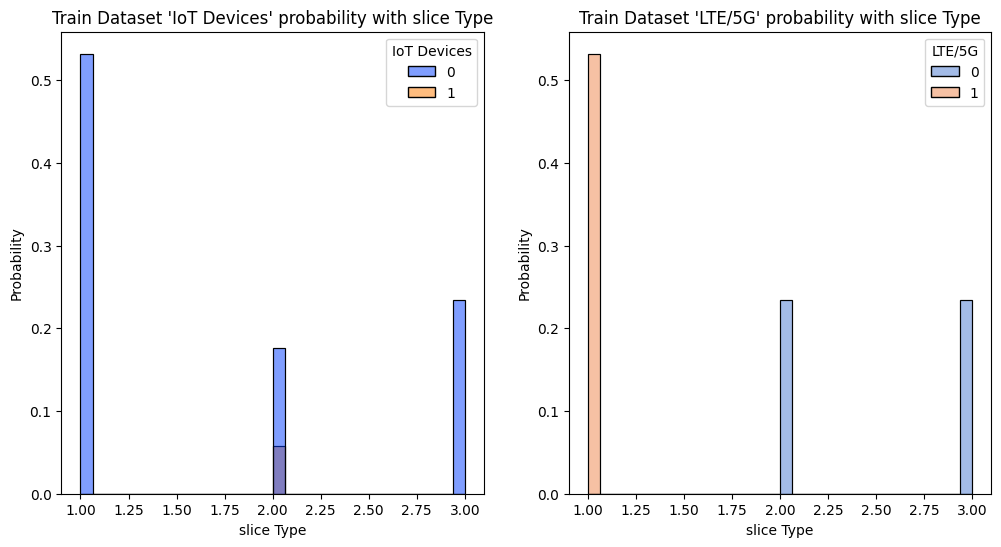

In [ ]:
plt.figure(figsize = (12,6))
#For IoT
plt.subplot(1,2,1)
plt.title("Train Dataset 'IoT Devices' probability with slice Type")
sns.histplot(data = train_dataset,x = "slice Type",hue = "IoT Devices",
             palette = sns.color_palette("bright",3),stat = "probability",alpha = 0.5)
#For LTE/5G
plt.subplot(1,2,2)
plt.title("Train Dataset 'LTE/5G' probability with slice Type")
sns.histplot(data = train_dataset,x = "slice Type",hue = "LTE/5G",palette = "muted",stat = "probability"
            ,alpha = 0.5)

This Python code below analyzes a dataset, train_dataset, focusing on the "GBR" and "slice Type" columns. It calculates the counts for each unique pair, constructs a DataFrame, and visualizes the results using a scatter plot with seaborn. The plot showcases the distribution of slice types across varying GBR values.

   GBR  slice Type  count
0    1           1   8422
1    0           1   8377
2    0           3   7392
3    1           2   5512
4    0           2   1880


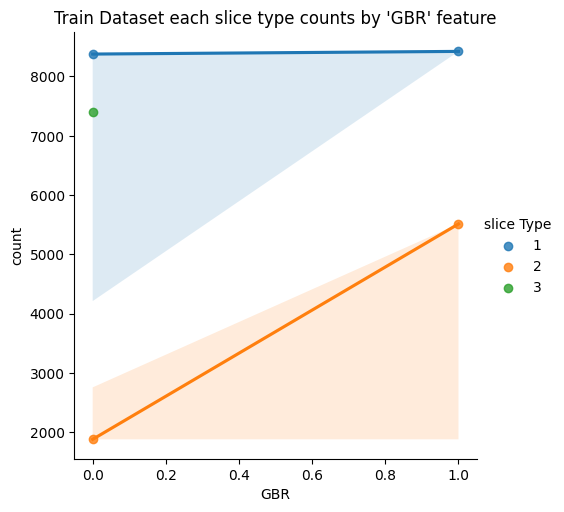

In [ ]:
#Find the counts of each slice for GBR.
GBR_slice_type = pd.concat([train_dataset["GBR"],train_dataset["slice Type"]],axis = 1)
GBR = pd.DataFrame(GBR_slice_type.value_counts().index.get_level_values(0).values,columns = ["GBR"])
slice_type = pd.DataFrame(GBR_slice_type.value_counts().index.get_level_values(1).values,
                         columns = ["slice Type"])

counts = pd.DataFrame(GBR_slice_type.value_counts().values,columns = ["count"])
GBR_slice_type = pd.concat([GBR,slice_type,counts],axis = 1)

#Plot GBR with slice Type total counts.
print(GBR_slice_type)

sns.lmplot(data = GBR_slice_type, x = "GBR", y = "count",hue = "slice Type").set(
    title = "Train Dataset each slice type counts by 'GBR' feature")

This code below employs Seaborn's `displot` to create a 2D histogram, illustrating the interplay between 'AR/VR/Gaming' (x-axis) and 'LTE/5G' (y-axis) in the train dataset. 'slice Type' is distinguished by colors. The plot provides insights into the distribution and correlation of these features across various network slices.

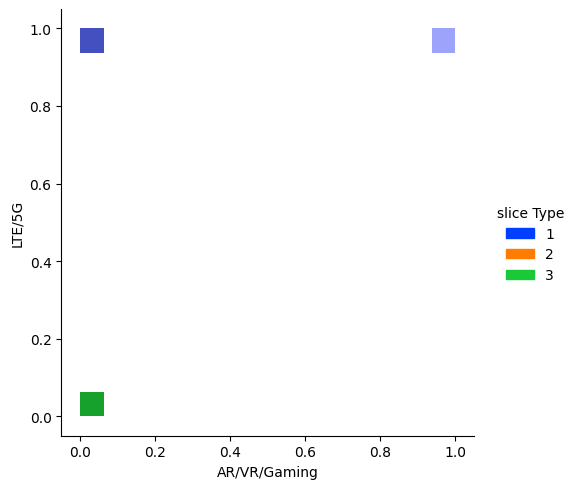

In [ ]:
sns.displot(data = train_dataset,x = "AR/VR/Gaming",y = "LTE/5G",hue = "slice Type",
            palette = "bright")

The code below builds visualizations that present the probability distribution of 'slice Type' concerning the 'Healthcare' and 'Industry 4.0' features in the train dataset. The left subplot displays the influence of 'Healthcare' on different slice types, while the right subplot illustrates a similar analysis for the 'Industry 4.0' feature. The varying shades represent different categories, providing a comprehensive view of the relationships between slice types and these specific attributes.

<Axes: title={'center': "Train Dataset 'slice Type' with respect to 'Industry 4.0' feature"}, xlabel='slice Type', ylabel='Probability'>

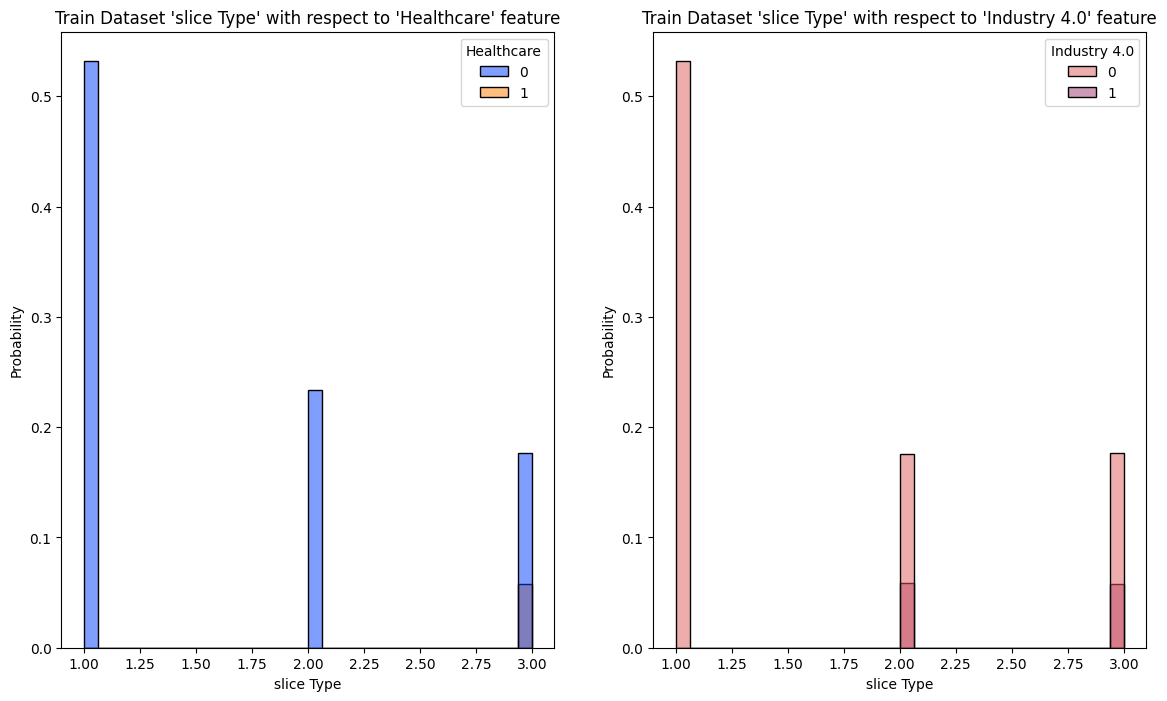

In [ ]:
plt.figure(figsize = (14 ,8))

plt.subplot(1,2,1)
plt.title("Train Dataset 'slice Type' with respect to 'Healthcare' feature")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Healthcare",stat = "probability",
            palette = "bright",alpha = 0.5)

plt.subplot(1,2,2)
plt.title("Train Dataset 'slice Type' with respect to 'Industry 4.0' feature")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Industry 4.0",stat = "probability",
            palette = "flare",alpha = 0.5)

This following code snippet generates a Matplotlib figure with two subplots. The first subplot is a scatter plot depicting the relationship between "Public Safety" and "Packet delay" in the train dataset, where each point is color-coded based on the "slice Type." The second subplot visualizes the connection between "Public Safety" and "GBR" with the same color-coded differentiation. These visualizations aim to explore potential patterns or correlations within the dataset.

<Axes: title={'center': "Train Dataset 'Public Safety' and related 'GBR' with 'slice Type' hue."}, xlabel='Public Safety', ylabel='GBR'>

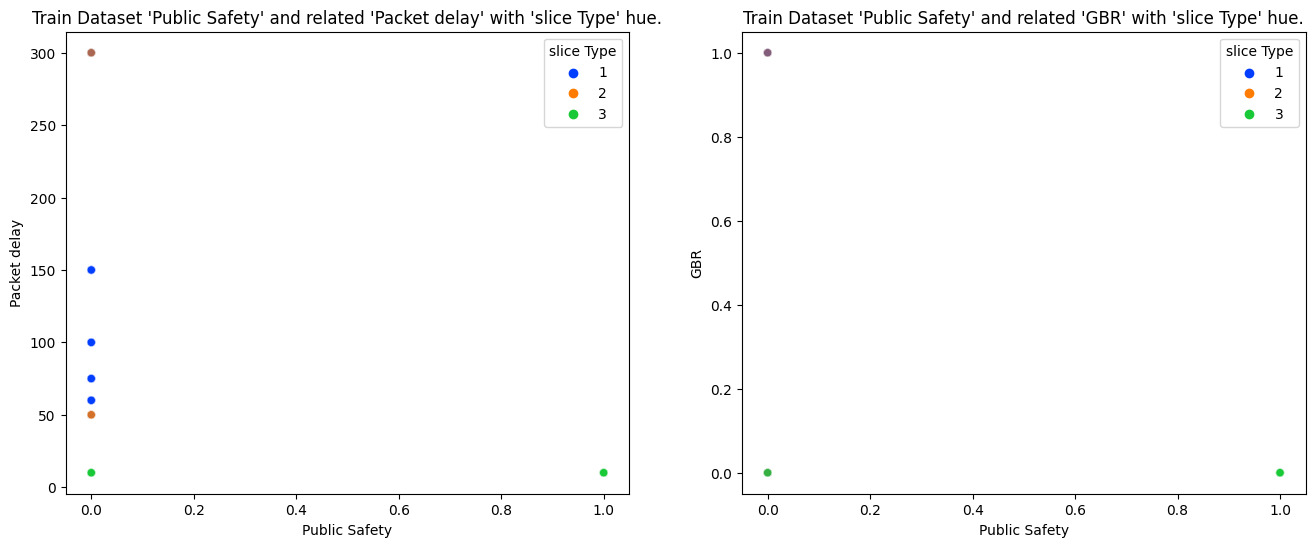

In [ ]:
plt.figure(figsize = (16 ,6))
#Train Dataset 'Public Safety' and related 'Packet delay' with 'slice Type' hue.
plt.subplot(1,2,1)
plt.title("Train Dataset 'Public Safety' and related 'Packet delay' with 'slice Type' hue.")
sns.scatterplot(data = train_dataset,x = "Public Safety",y = "Packet delay",hue = "slice Type",
             palette = "bright",alpha = 0.5)
#Train Dataset 'Public Safety' and related 'GBR' with 'slice Type' hue.
plt.subplot(1,2,2)
plt.title("Train Dataset 'Public Safety' and related 'GBR' with 'slice Type' hue.")
sns.scatterplot(data = train_dataset,x = "Public Safety",y = "GBR",hue = "slice Type",
             palette = "bright",alpha = 0.5)

The code builds scatterplots that depict relationships in the train dataset involving 'Smart Transportation' and two key metrics: 'GBR' (left subplot) and 'Packet delay' (right subplot). Each point represents a data instance, with color indicating the associated 'slice Type.' The left subplot explores how 'Smart Transportation' correlates with 'GBR' across different slice types, while the right subplot examines its relationship with 'Packet delay.' These visualizations provide insights into the patterns and variations within the dataset concerning these factors.

<Axes: title={'center': "Train Dataset 'Smart Transportation' and related 'Packet delay' with 'slice Type' hue."}, xlabel='Smart Transportation', ylabel='Packet delay'>

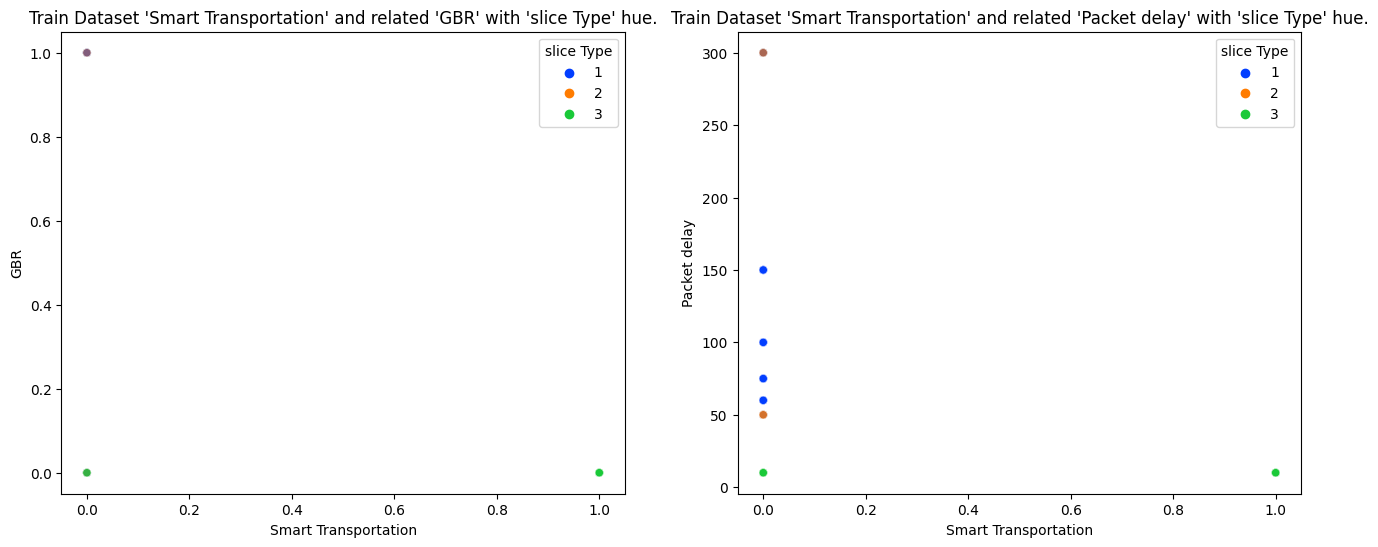

In [ ]:
plt.figure(figsize = (16 ,6))
#Train Dataset 'Smart Transportation' and related 'GBR' with 'slice Type' hue.
plt.subplot(1,2,1)
plt.title("Train Dataset 'Smart Transportation' and related 'GBR' with 'slice Type' hue.")
sns.scatterplot(data = train_dataset,x = "Smart Transportation",y = "GBR",hue = "slice Type",
             palette = "bright",alpha = 0.5)
#Train Dataset 'Smart Transportation' and related 'Packet delay' with 'slice Type' hue.
plt.subplot(1,2,2)
plt.title("Train Dataset 'Smart Transportation' and related 'Packet delay' with 'slice Type' hue.")
sns.scatterplot(data = train_dataset,x = "Smart Transportation",y = "Packet delay",hue = "slice Type",
             palette = "bright",alpha = 0.5)

The following code creates a pair of visualizations for the train dataset. The first subplot displays the probability distribution of 'slice Type' with respect to 'Smartphone,' utilizing color-coded bars to differentiate smartphone categories. The second subplot visualizes the relationship between 'Packet delay' and 'Smartphone,' offering insights into how different smartphones affect packet delays. The use of kernel density estimates enhances the clarity of these distributions. The alpha parameter controls the transparency of overlapping elements, providing a clearer view of the dataset's patterns and relationships.

<Axes: title={'center': "Train Dataset 'Packet delay' with respect to 'Smartphone' feature"}, xlabel='Packet delay', ylabel='Probability'>

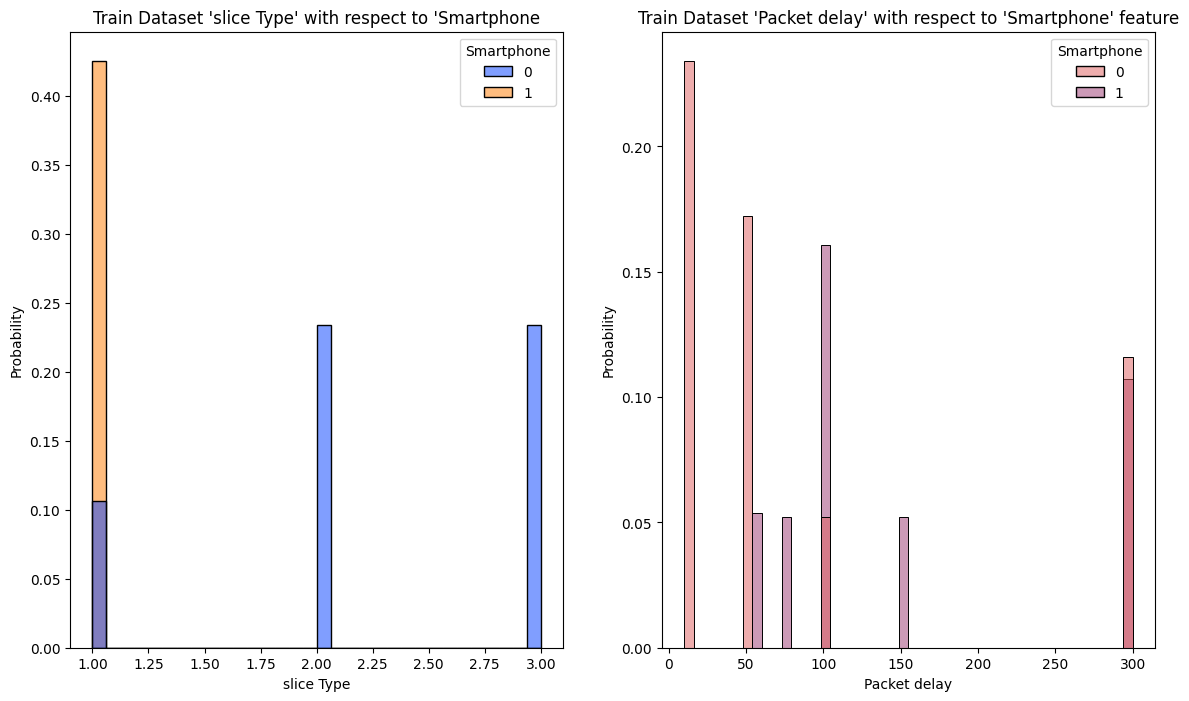

In [ ]:
plt.figure(figsize = (14 ,8))
#For Train Dataset 'slice Type' with respect to 'Smartphone' feature.
plt.subplot(1,2,1)
plt.title("Train Dataset 'slice Type' with respect to 'Smartphone")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Smartphone",stat = "probability",
            palette = "bright",alpha = 0.5)
#For Train Dataset 'Packet delay' with respect to 'Smartphone' feature.
plt.subplot(1,2,2)
plt.title("Train Dataset 'Packet delay' with respect to 'Smartphone' feature")
sns.histplot(data = train_dataset,x = "Packet delay",hue = "Smartphone",stat = "probability",
            palette = "flare",alpha = 0.5)

In this code snippet, a visual exploration of two features in the train dataset is presented through two subplots. The first subplot showcases the probability distribution of 'GBR' (Guaranteed Bit Rate) in relation to the 'Smartphone' feature, employing color-coded bars for a clear distinction. Meanwhile, the second subplot depicts the probability distribution of 'LTE/5g Category' with respect to the 'Smartphone' feature. The use of a kernel density estimate (KDE) in both subplots provides a smoothed representation of the data, and the alpha parameter enhances clarity by adjusting the transparency of overlapping elements.

#Feature Extraction

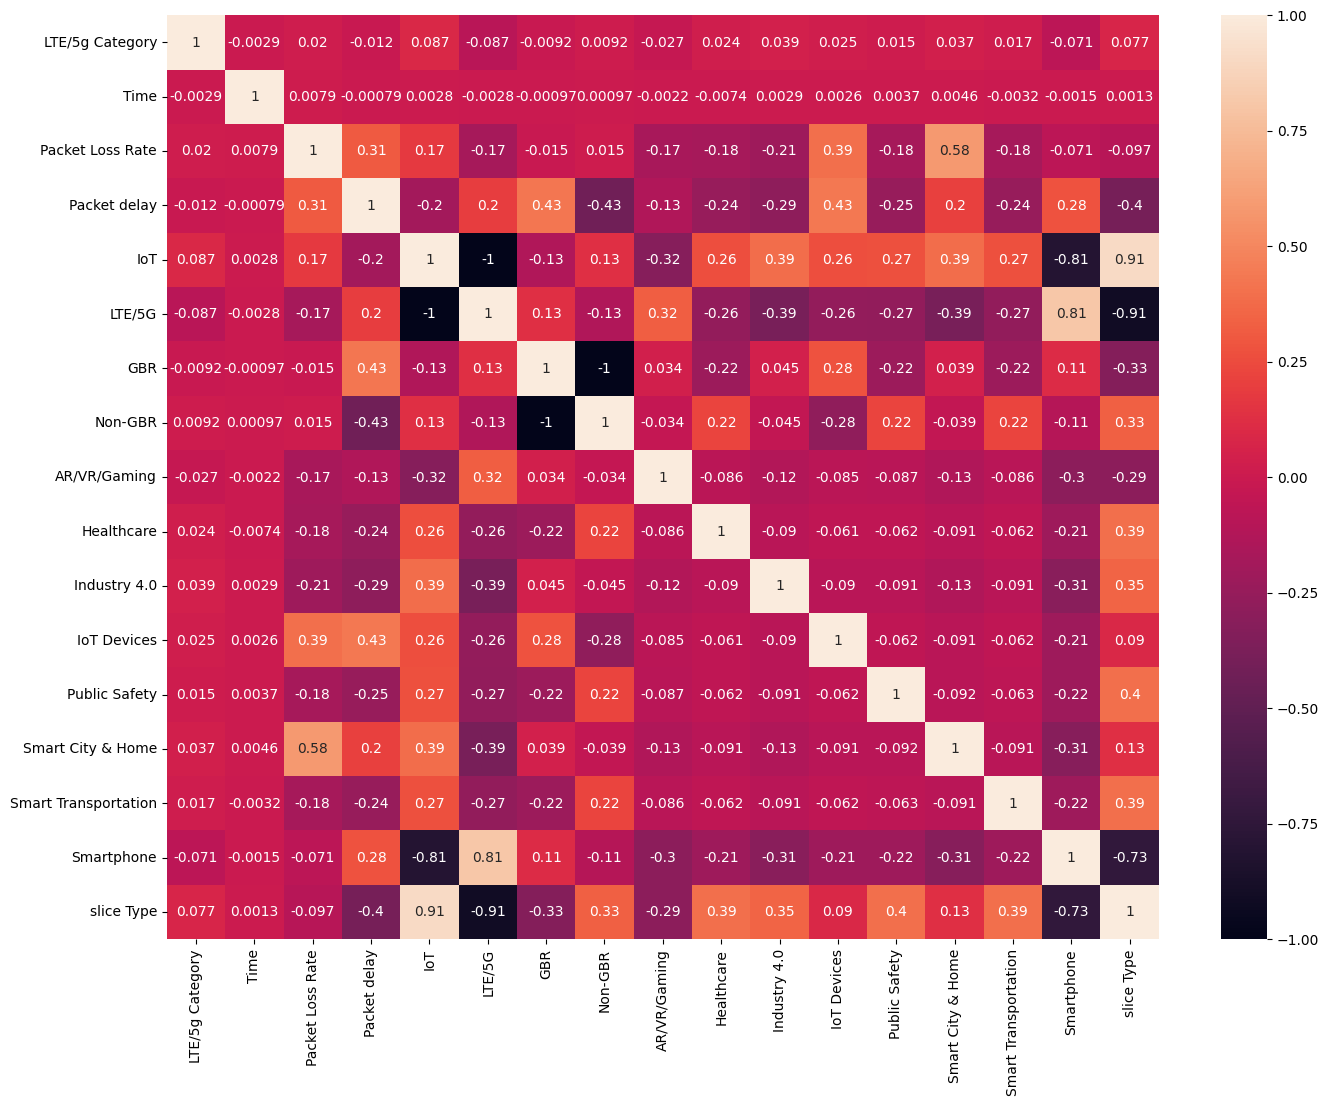

In [ ]:
corr_results = train_dataset.corr()
fig = plt.figure(figsize = (16,12))

sns.heatmap(corr_results,annot = True)
plt.show()

In [ ]:
train_dataset.drop(columns = ["Time","IoT"],inplace = True)
test_dataset.drop(columns = ["Time","IoT"],inplace = True)

In [ ]:
train_dataset.head(5)

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0.000001,10,0,0,1,0,0,0,0,1,0,0,0,3
1,18,0.001000,100,1,1,0,1,0,0,0,0,0,0,0,1
2,17,0.000001,300,1,0,1,0,0,0,0,0,0,0,1,1
3,3,0.010000,100,1,0,1,0,0,0,0,0,0,0,1,1
4,9,0.010000,50,0,0,1,0,0,0,0,0,1,0,0,2


In [ ]:
test_dataset.head(5)

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,0.001000,100,1,1,0,1,0,0,0,0,0,0,0
1,14,0.000001,10,0,0,1,0,0,0,0,0,0,1,0
2,11,0.001000,50,0,1,0,0,0,1,0,0,0,0,0
3,20,0.001000,50,0,1,0,0,0,1,0,0,0,0,0
4,2,0.001000,50,1,0,1,1,0,0,0,0,0,0,0


#Data Processing

In [ ]:
import keras
from keras.utils import to_categorical

def label_processing(df):
    # No Standartization because the features are classification datas.
    target_y = df.iloc[:,-1:].values
    target_y = to_categorical(target_y)
    return target_y

# Get the processed y labels
train_y = label_processing(train_dataset)


In [ ]:
print(train_dataset.iloc[:,-1:].values.shape)
print(train_y)

(31583, 1)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


#Train and Validation Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(train_dataset.iloc[:,:-1],train_y,random_state=43,test_size= 0.2)

In [ ]:
print(f"{X_train.shape} , {X_val.shape}")

(25266, 14) , (6317, 14)


In [ ]:
#Split test and val dataset.
X_val,X_test,Y_val,Y_test = train_test_split(X_val,Y_val,random_state = 43,test_size = 0.5)

In [ ]:
print(f"{X_train.shape}, {X_test.shape}, {X_val.shape}")

(25266, 14), (3159, 14), (3158, 14)


#Deep Neural Networks

In [ ]:
from keras.layers import Conv1D,ConvLSTM1D,Flatten,Dense,BatchNormalization,Dropout
from keras.models import Sequential
def build_model():
    model = Sequential()
    #Input layer
    model.add(Dense(8,activation = "relu",kernel_initializer = "normal",input_dim = 14))
    #Hidden layer 1
    model.add(Dense(16,activation = "relu",kernel_initializer = "normal"))
    #Dropout and Batch Normalization 1
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #Hidden layer 2
    model.add(Dense(32,activation = "relu",kernel_initializer = "normal"))
    #Dropout and Batch Normalization 2
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #Flatten
    model.add(Flatten())
    #Fully connected layer
    model.add(Dense(32,activation = "relu",kernel_initializer = "normal"))
    #Output layer
    model.add(Dense(4,activation = "softmax",kernel_initializer = "normal"))
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 120       
                                                                 
 dense_11 (Dense)            (None, 16)                144       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                      

In [ ]:
!pip install visualkeras

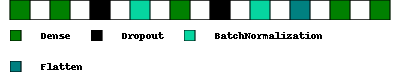

In [ ]:
import visualkeras
from PIL import ImageFont
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv1D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'black'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model,legend = True,draw_volume = False,spacing = 20,
                        color_map = color_map)

#Compiling the model

In [ ]:
import tensorflow as tf
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = "categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
#Add dimension for convolution.
X_train = np.expand_dims(X_train,axis = -1)
X_val = np.expand_dims(X_val,axis = -1)

#Training and Evaluating the model

In [ ]:
history = model.fit(X_train,Y_train,batch_size = 64,epochs = 20,
                         validation_data=(X_val,Y_val),
          callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3))

Epoch 1/20
395/395 [==============================] - 4s 4ms/step - loss: 0.4969 - accuracy: 0.7812 - val_loss: 0.4449 - val_accuracy: 0.8170
Epoch 2/20
395/395 [==============================] - 1s 4ms/step - loss: 0.2814 - accuracy: 0.8395 - val_loss: 0.1736 - val_accuracy: 0.8876
Epoch 3/20
105/395 [======>.......................] - ETA: 1s - loss: 0.2511 - accuracy: 0.8537

In [ ]:
fig = plt.figure(figsize = (12,5))

epochs = len(history.history["accuracy"])
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("Train Accuracy and Val Accuracy")
plt.plot(range(epochs),history.history["accuracy"])
plt.plot(range(epochs),history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

plt.subplot(1,2,2)
plt.title("Train Loss and Val Loss")
plt.plot(range(epochs),history.history["loss"])
plt.plot(range(epochs),history.history["val_loss"])
plt.legend(["loss","val_loss"])


#SecureSlice Model Prediction

In [ ]:
#Evaluation of model on test dataset.
model.evaluate(X_test,Y_test)
#Prediction on X_test
preds_X_test = model.predict(X_test)
#Decode Y_test and predictions on X_test
Y_test = [np.argmax(Y_test[i]) for i in range(len(Y_test))]
preds_X_test_decoded = [np.argmax(preds_X_test[i]) for i in range(len(preds_X_test))]

99/99 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,preds_X_test_decoded))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91      1711
           2       1.00      0.53      0.69       732
           3       1.00      1.00      1.00       716

    accuracy                           0.89      3159
   macro avg       0.94      0.84      0.87      3159
weighted avg       0.91      0.89      0.88      3159



In [ ]:
preds = model.predict(test_dataset)
print(preds)

987/987 [==============================] - 3s 3ms/step
[[1.24533517e-05 9.99379456e-01 5.73282363e-04 3.48094400e-05]
 [1.15926376e-07 7.19525595e-09 8.18816019e-08 9.99999702e-01]
 [7.58526767e-06 2.76417914e-03 9.92623150e-01 4.60505672e-03]
 ...
 [1.51653694e-07 9.84293003e-09 1.37865413e-07 9.99999583e-01]
 [1.18972484e-05 9.99387324e-01 5.64871414e-04 3.59730329e-05]
 [1.51653694e-07 9.84293003e-09 1.37865413e-07 9.99999583e-01]]


In [ ]:
#Decode predictions.
preds_decoded = [np.argmax(preds[i]) for i in range(len(preds))]
test_dataset["predicted_slice_type"] = preds_decoded
test_dataset

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,predicted_slice_type
0,15,0.001000,100,1,1,0,1,0,0,0,0,0,0,0,1
1,14,0.000001,10,0,0,1,0,0,0,0,0,0,1,0,3
2,11,0.001000,50,0,1,0,0,0,1,0,0,0,0,0,2
3,20,0.001000,50,0,1,0,0,0,1,0,0,0,0,0,2
4,2,0.001000,50,1,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,9,0.000001,10,0,0,1,0,0,0,0,0,0,1,0,3
31580,20,0.000001,10,0,0,1,0,0,1,0,0,0,0,0,3
31581,8,0.000001,10,0,0,1,0,0,1,0,0,0,0,0,3
31582,13,0.010000,75,1,0,1,0,0,0,0,0,0,0,1,1


#XGBoost Model Prediction

In [ ]:
!pip install xgboost

In [ ]:
train_dataset.iloc[:,:-1]

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,14,0.000001,10,0,0,1,0,0,0,0,1,0,0,0
1,18,0.001000,100,1,1,0,1,0,0,0,0,0,0,0
2,17,0.000001,300,1,0,1,0,0,0,0,0,0,0,1
3,3,0.010000,100,1,0,1,0,0,0,0,0,0,0,1
4,9,0.010000,50,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,14,0.010000,100,1,0,1,0,0,0,0,0,0,0,1
31579,12,0.010000,50,0,0,1,0,0,0,0,0,1,0,0
31580,18,0.010000,300,0,1,0,0,0,0,1,0,0,0,0
31581,8,0.000001,10,0,0,1,0,1,0,0,0,0,0,0


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate = 0.1,n_estimators = 10,objective = "multi:softmax",num_class = 3)
#Label encoder for training to start slices from 0.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
xgb_y_train = LE.fit_transform(train_dataset["slice Type"])
#Training
xgb_model.fit(train_dataset.iloc[:,:-1],xgb_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
#Prediction on x test
xgb_preds = xgb_model.predict(X_test)
xgb_preds = LE.inverse_transform(xgb_preds)
#Classification report
print(classification_report(Y_test,xgb_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1711
           2       1.00      1.00      1.00       732
           3       1.00      1.00      1.00       716

    accuracy                           1.00      3159
   macro avg       1.00      1.00      1.00      3159
weighted avg       1.00      1.00      1.00      3159



In [ ]:
#Prediction on test dataset
xgb_preds_test = xgb_model.predict(test_dataset.iloc[:,:-1])
xgb_preds_test = LE.inverse_transform(xgb_preds_test)
print(xgb_preds_test)

[1 3 2 ... 3 1 3]


#Comparison of results predicted by XGBoost Model and SecureSlice Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# SecureSlice Model Results
secure_slice_preds_subset = preds_decoded[:3000]
Y_test_subset = Y_test[:3000]

# XGBoost Model Results
xgb_model_preds_subset = xgb_preds_test[:3000]

In [ ]:

# Accuracy Comparison
secure_slice_accuracy_subset = accuracy_score(Y_test_subset, secure_slice_preds_subset)
xgb_model_accuracy_subset = accuracy_score(Y_test_subset, xgb_model_preds_subset)

# Precision, Recall, and F1 Score
secure_slice_precision = precision_score(Y_test_subset, secure_slice_preds_subset, average='weighted')
xgb_model_precision = precision_score(Y_test_subset, xgb_model_preds_subset, average='weighted')

secure_slice_recall = recall_score(Y_test_subset, secure_slice_preds_subset, average='weighted')
xgb_model_recall = recall_score(Y_test_subset, xgb_model_preds_subset, average='weighted')

secure_slice_f1 = f1_score(Y_test_subset, secure_slice_preds_subset, average='weighted')
xgb_model_f1 = f1_score(Y_test_subset, xgb_model_preds_subset, average='weighted')

print("SecureSlice Model Metrics (Subset):")
print(f"Accuracy: {secure_slice_accuracy_subset:.4f}")
print(f"Precision: {secure_slice_precision:.4f}")
print(f"Recall: {secure_slice_recall:.4f}")
print(f"F1 Score: {secure_slice_f1:.4f}")

print("\nXGBoost Model Metrics (Subset):")
print(f"Accuracy: {xgb_model_accuracy_subset:.4f}")
print(f"Precision: {xgb_model_precision:.4f}")
print(f"Recall: {xgb_model_recall:.4f}")
print(f"F1 Score: {xgb_model_f1:.4f}")

SecureSlice Model Metrics (Subset):
Accuracy: 0.4257
Precision: 0.3934
Recall: 0.4257
F1 Score: 0.4028

XGBoost Model Metrics (Subset):
Accuracy: 0.3893
Precision: 0.3927
Recall: 0.3893
F1 Score: 0.3910


In [ ]:

# Confusion Matrix Comparison
secure_slice_conf_matrix_subset = confusion_matrix(Y_test_subset, secure_slice_preds_subset)
xgb_model_conf_matrix_subset = confusion_matrix(Y_test_subset, xgb_model_preds_subset)

print("\nSecureSlice Model Confusion Matrix (Subset):")
print(secure_slice_conf_matrix_subset)

print("\nXGBoost Model Confusion Matrix (Subset):")
print(xgb_model_conf_matrix_subset)


SecureSlice Model Confusion Matrix (Subset):
[[1032  204  376]
 [ 461   88  155]
 [ 447   80  157]]

XGBoost Model Confusion Matrix (Subset):
[[848 388 376]
 [386 163 155]
 [346 181 157]]


In [ ]:
# Classification Report
secure_slice_classification_report = classification_report(Y_test_subset, secure_slice_preds_subset)
xgb_model_classification_report = classification_report(Y_test_subset, xgb_model_preds_subset)

print("\nSecureSlice Model Classification Report (Subset):")
print(secure_slice_classification_report)

print("\nXGBoost Model Classification Report (Subset):")
print(xgb_model_classification_report)


SecureSlice Model Classification Report (Subset):
              precision    recall  f1-score   support

           1       0.53      0.64      0.58      1612
           2       0.24      0.12      0.16       704
           3       0.23      0.23      0.23       684

    accuracy                           0.43      3000
   macro avg       0.33      0.33      0.32      3000
weighted avg       0.39      0.43      0.40      3000


XGBoost Model Classification Report (Subset):
              precision    recall  f1-score   support

           1       0.54      0.53      0.53      1612
           2       0.22      0.23      0.23       704
           3       0.23      0.23      0.23       684

    accuracy                           0.39      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.39      0.39      0.39      3000



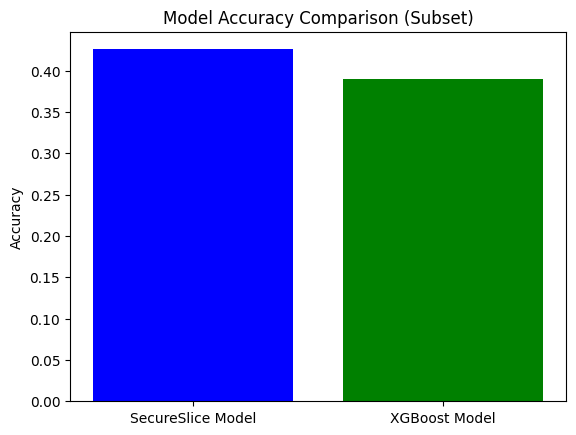

In [ ]:
# Comparing Accuracy in a Bar Chart
labels_subset = ["SecureSlice Model", "XGBoost Model"]
accuracies_subset = [secure_slice_accuracy_subset, xgb_model_accuracy_subset]

plt.bar(labels_subset, accuracies_subset, color=['blue', 'green'])
plt.title("Model Accuracy Comparison (Subset)")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot encoding for multiclass classification
secure_slice_preds_one_hot = to_categorical(secure_slice_preds_subset)
xgb_model_preds_one_hot = to_categorical(xgb_model_preds_subset)
Y_test_one_hot = to_categorical(Y_test_subset)


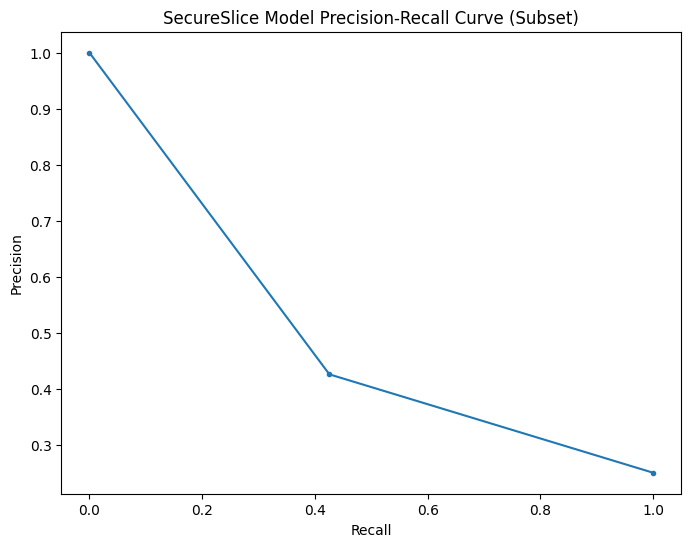

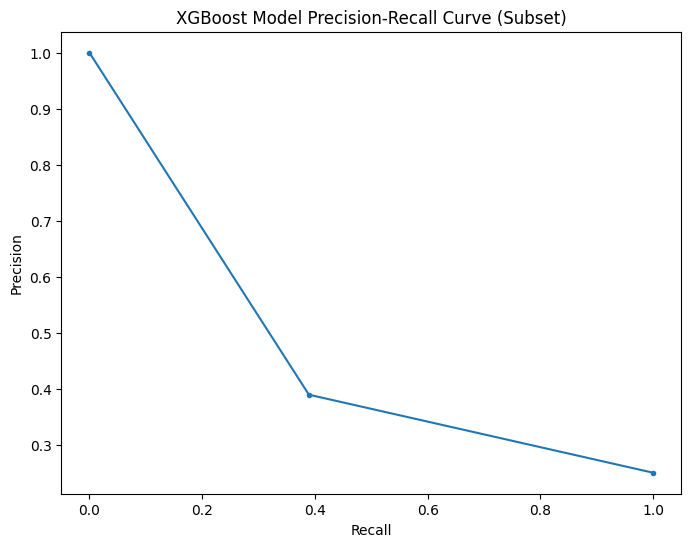

In [ ]:
# Precision-Recall Curve
secure_slice_precision, secure_slice_recall, _ = precision_recall_curve(Y_test_one_hot.ravel(), secure_slice_preds_one_hot.ravel())
xgb_model_precision, xgb_model_recall, _ = precision_recall_curve(Y_test_one_hot.ravel(), xgb_model_preds_one_hot.ravel())

plot_precision_recall_curve(secure_slice_precision, secure_slice_recall, "SecureSlice Model Precision-Recall Curve (Subset)")
plot_precision_recall_curve(xgb_model_precision, xgb_model_recall, "XGBoost Model Precision-Recall Curve (Subset)")

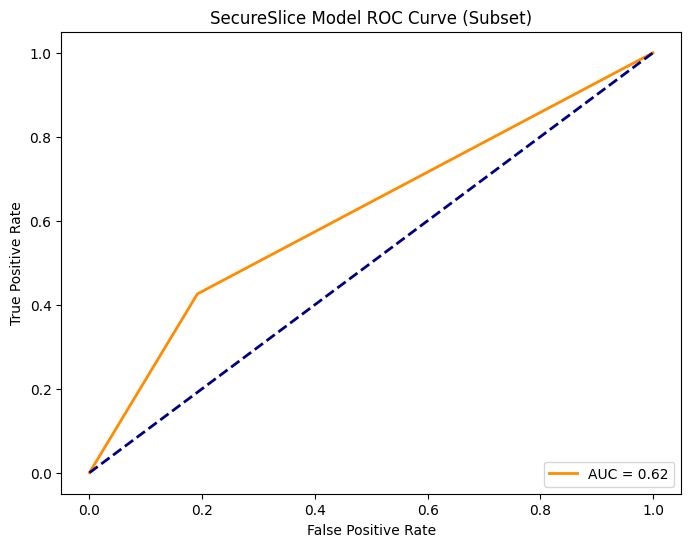

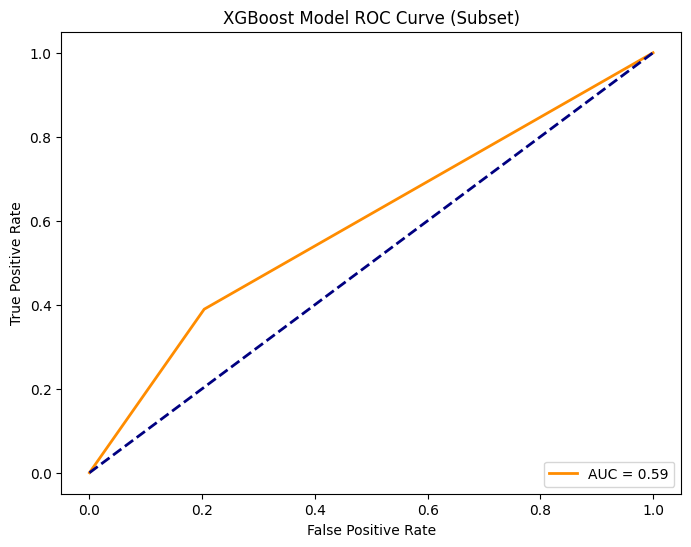

In [ ]:
# ROC Curve
secure_slice_fpr, secure_slice_tpr, _ = roc_curve(Y_test_one_hot.ravel(), secure_slice_preds_one_hot.ravel())
xgb_model_fpr, xgb_model_tpr, _ = roc_curve(Y_test_one_hot.ravel(), xgb_model_preds_one_hot.ravel())

secure_slice_roc_auc = auc(secure_slice_fpr, secure_slice_tpr)
xgb_model_roc_auc = auc(xgb_model_fpr, xgb_model_tpr)

plot_roc_curve(secure_slice_fpr, secure_slice_tpr, secure_slice_roc_auc, "SecureSlice Model ROC Curve (Subset)")
plot_roc_curve(xgb_model_fpr, xgb_model_tpr, xgb_model_roc_auc, "XGBoost Model ROC Curve (Subset)")